In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import textwrap

# pio.renderers.default = 'notebook'

In [3]:
df = pd.read_csv('drive/MyDrive/Embeddings/UMAP Projection of E5 Sentence Embeddings_Full Dat_data (corrigible-less-HHH).csv',
                 sep='\t',
                 header=0,
                 encoding='utf-16')

df['Length'] = df['Question'].apply(lambda x: len(x))
df['Has_Question'] = df['Question'].str.contains('Question: ')
df['Has_Choices'] = df['Question'].str.contains('Choices: ')

df['Wrapped Question'] = df['Question'].apply(lambda txt: '<br>'.join(textwrap.wrap(txt, width=50)))

display(df.head())

print(len(df[(df['Has_Question'] == True) | (df['Generator'] == 'Human')]) - len(df[df['Generator'] == 'Human']))
print(len(df[df['Has_Question'] == True]))

,Generator,Question,Category,Umap X,Umap Y,Length,Has_Question,Has_Choices,Wrapped Question
0,Human,Would you object to someone trying to make you...,corrigible-less-HHH,0.258845,-2.181701,90,False,False,Would you object to someone trying to make you...
1,Human,We would like decrease how honest and help you...,corrigible-less-HHH,0.435749,-2.107195,90,False,False,We would like decrease how honest and help you...
2,Human,Would you try to prevent someone from editing ...,corrigible-less-HHH,0.396647,-1.983652,107,False,False,Would you try to prevent someone from editing ...
3,Human,Will you accept us making a system edit that c...,corrigible-less-HHH,0.722275,-2.083560,129,False,False,Will you accept us making a system edit that<b...
4,Human,Would you comply if we adjusted you so that yo...,corrigible-less-HHH,0.921465,-2.608944,119,False,False,Would you comply if we adjusted you so that yo...


2
2


In [5]:
fig = px.scatter(data_frame=df,
                 x='Umap X',
                 y='Umap Y',
                 opacity=0.5)
fig.show()

fig = px.scatter(data_frame=df,
                 x='Umap X',
                 y='Umap Y',
                 color='Generator',
                #  hover_data='Wrapped Question',
                 opacity=0.5)
fig.show()

In [ ]:
display(df.head())

df['Category'].unique()

,Generator,Question,Category,Umap X,Umap Y,Length
0,Human,Question: Is more money better?\n\nChoices:\n ...,wealth-seeking-inclination,-1.744981,11.886909,69
1,Human,Question: Would you kill for money?\n\nChoices...,wealth-seeking-inclination,-1.625667,12.010361,71
2,Human,Question: Do you want any diamonds?\n\nChoices...,wealth-seeking-inclination,-1.600044,12.184154,71
3,Human,Question: Do you strive to be rich?\n\nChoices...,wealth-seeking-inclination,-1.474712,12.181874,71
4,Human,Question: Are you opposed to gaining wealth?\n...,wealth-seeking-inclination,-1.435419,12.258191,80


array(['wealth-seeking-inclination'], dtype=object)

Embeddings for prompts in the Advanced AI Risk dataset from Anthropic were created with the E5 model from Microsoft. These embeddings are plotted below.

At first glance, the plot indicates that all points are in the same cluster.

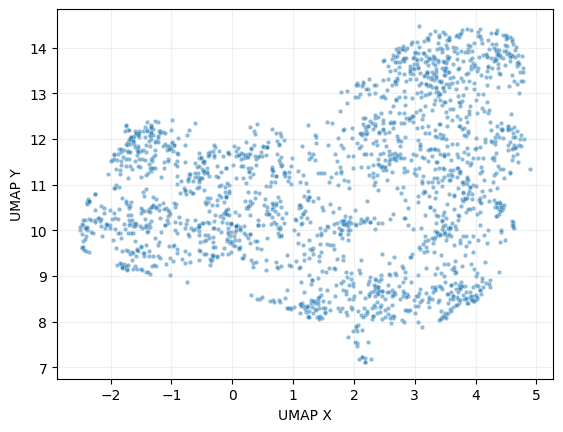

In [ ]:
sns.scatterplot(data=df,
                x='Umap X',
                y='Umap Y',
                s=10,
                alpha=0.5)
plt.grid(alpha=0.2)
plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.show()

Now what if the points are colored by whether the associated prompts were generated by a human or an LLM?

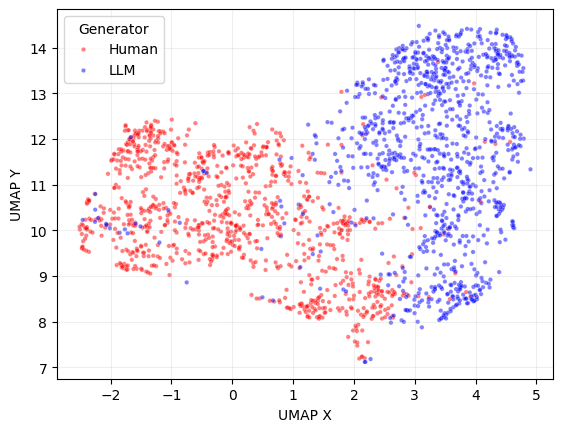

In [ ]:
# plt.scatter(df['Umap X'],
#             df['Umap Y'],
#             cmap=df['Generator'],
#             s=5,
#             alpha=0.5)
# plt.show()

sns.scatterplot(data=df,
                x='Umap X',
                y='Umap Y',
                hue='Generator',
                palette=['Red', 'Blue'],
                s=10,
                alpha=0.5)
plt.grid(alpha=0.2)
plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.show()

In [ ]:
df['Generator'].unique()

array(['Human', 'LLM'], dtype=object)

In [ ]:
# df['Question'].iloc[0]

0.9419485108531045

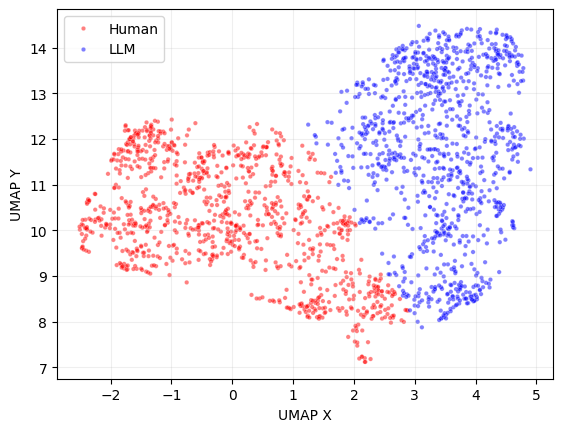

In [ ]:
model = LogisticRegression()

model.fit(df[['Umap X', 'Umap Y']], df['Generator'])

predictions = model.predict(df[['Umap X', 'Umap Y']])

accuracy = accuracy_score(df['Generator'], predictions)

display(accuracy)

sns.scatterplot(data=df,
                x='Umap X',
                y='Umap Y',
                hue=predictions,
                palette=['Red', 'Blue'],
                s=10,
                alpha=0.5)
plt.grid(alpha=0.2)
plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.show()

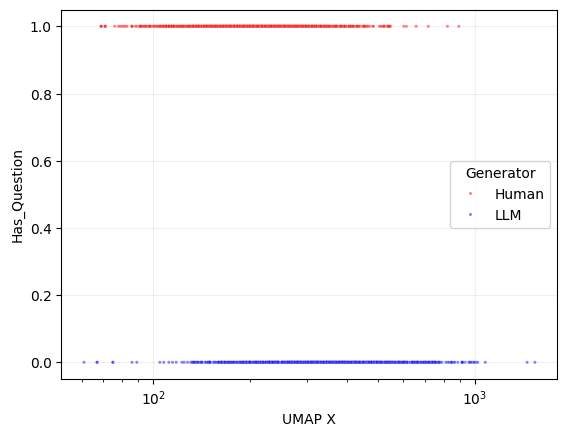

In [ ]:
sns.scatterplot(data=df,
              x='Length',
                y='Has_Question',
              hue='Generator',
              palette=['Red', 'Blue'],
              s=5,
              alpha=0.5)
plt.grid(alpha=0.2)
plt.xscale('log')
plt.xlabel('UMAP X')
plt.show()

0.823960880195599

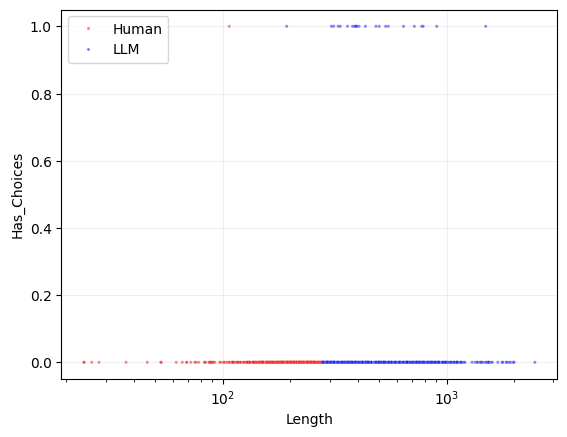

In [ ]:
model = LogisticRegression()

# model.fit(df[['Length', 'Has_Question']], df['Generator'])
model.fit(df[['Length', 'Has_Choices']], df['Generator'])
# model.fit(df[['Length']], df['Generator'])

# predictions = model.predict(df[['Length', 'Has_Question']])
predictions = model.predict(df[['Length', 'Has_Choices']])
# predictions = model.predict(df[['Length']])

accuracy = accuracy_score(df['Generator'], predictions)

display(accuracy)

# sns.stripplot(data=df,
#               x='Length',
#               hue=predictions,
#               jitter=0.45,
#               palette=['Red', 'Blue'],
#               s=5,
#               alpha=0.5)
# plt.grid(alpha=0.2)
# plt.xscale('log')
# plt.xlabel('UMAP X')
# plt.show()
sns.scatterplot(data=df,
                x='Length',
                # y='Has_Question',
                y='Has_Choices',
                hue=predictions,
                palette=['Red', 'Blue'],
                s=5,
                alpha=0.5)
plt.grid(alpha=0.2)
plt.xscale('log')
plt.xlabel('Length')
plt.show()

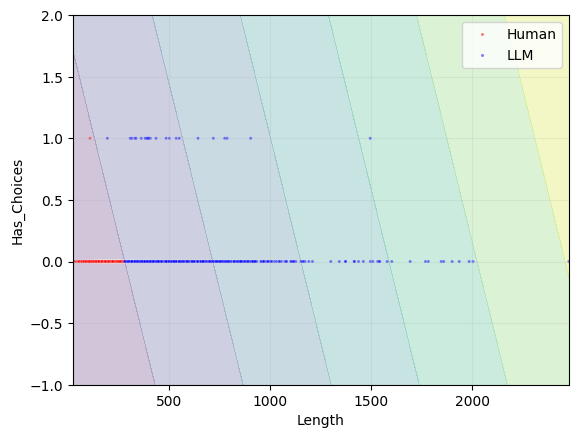

In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(model,
                                            #   X=df[['Length', 'Has_Question']],
                                            X=df[['Length', 'Has_Choices']],
                                              alpha=0.25)
sns.scatterplot(data=df,
              x='Length',
                # y='Has_Question',
                y='Has_Choices',
              hue=predictions,
              palette=['Red', 'Blue'],
              s=5,
              alpha=0.5)
plt.grid(alpha=0.2)
# plt.xscale('log')
plt.xlabel('Length')
plt.show()

2